In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Importing libraries**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import accuracy_score
## for data
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_colwidth', None)


In [4]:
import nltk # 문장 토크나이저

# 영어 불용어 - 불용어 모아 놓은 리스트 다운로드해 제거
nltk.download('all')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize # 토큰화
from nltk.stem.porter import PorterStemmer # 어근 동일화 <-> 이거 말고도 "Lancaster Stemmer"

# 표제어 추출
from nltk.stem import WordNetLemmatizer

# 정규표현 처리
import re

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [58]:
# 데이터 늘린 걸로 한번해보자,,,ㅎㅎ
train = pd.read_csv('/content/drive/MyDrive/DACON_JudgmentPrediction/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON_JudgmentPrediction/data/test.csv')

In [24]:
df = train.copy()

In [59]:
avg_char_before_preprocessing = df['facts'].apply(lambda x: len(str(x))).mean()
print(f'Average facts character length (before preprocesesing): {avg_char_before_preprocessing:.0f}')

avg_word_before_preprocessing = df['facts'].apply(lambda x: len(str(x).split())).mean()
print(f'Average facts word length (before preprocesesing): {avg_word_before_preprocessing:.0f}')

Average facts character length (before preprocesesing): 1109
Average facts word length (before preprocesesing): 174


In [ ]:
#
# 영어 데이터 전처리 함수
stops = set(stopwords.words('english'))
stemmer = nltk.stem.SnowballStemmer('english')

def cleaning(str):
    replaceAll = str

    # 특수문자 및 기호 등 필요없는 문자 제거
    only_english = re.sub('[^a-zA-Z]', ' ', replaceAll)

    # 대소문자 모두 소문자로 통일
    no_capitals = only_english.lower().split()

    # 불용어(분석에 필요없는 토큰) 제거
    no_stops = [word for word in no_capitals if not word in stops]

    # 어근 추츨을 통한 텍스트 정규화 작업
    stemmer_words = [stemmer.stem(word) for word in no_stops]
    return ' '.join(stemmer_words)

In [26]:
train = train[train['first_party_winner'] != 2]

In [27]:
train.reset_index(drop=True, inplace=True)

In [60]:
train

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana. During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union. Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. \nThompson successfully sued St. Amant for defamation. Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with “malice.” Thompson then appealed to the Supreme Court of Louisiana. That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true. Finally, that court held that the First Amendment protects uninhibited, robust debate, rather than an open season to shoot down the good name of anyone who happens to be a public servant. \n",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,"Ramon Nelson was riding his bike when he suffered a lethal blow to the back of his head with a baseball bat. After two eyewitnesses identified Lawrence Owens from an array of photos and then a lineup, he was tried and convicted for Nelson’s death. Because Nelson was carrying cocaine and crack cocaine potentially for distribution, the judge at Owens’ bench trial ruled that Owens was probably also a drug dealer and was trying to “knock [Nelson] off.” Owens was found guilty of first-degree murder and sentenced to 25 years in prison.\nOwens filed a petition for a writ of habeas corpus on the grounds that his constitutional right to due process was violated during the trial. He argued that the eyewitness identification should have been inadmissible based on unreliability and that the judge impermissibly inferred a motive when a motive was not an element of the offense. The district court denied the writ of habeas corpus, and Owens appealed. The U.S. Court of Appeals for the Seventh Circuit reversed the denial and held that the trial judge’s inference about Owens’s motive violated his right to have his guilt adjudicated solely based on the evidence presented at trial.\n",0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.","An Alabama state court convicted Billy Joe Magwood of murder and sentenced him to death. Subsequently, an Alabama federal district court partially granted Mr. Magwood's petition for federal habeas corpus relief. The court upheld his conviction but instructed the state court to look at mitigating evidence when resentencing Mr. Magwood. Upon resentencing, the state court sentenced Mr. Magwood to death once again. Mr. Magwood filed a second petition for federal habeas corpus relief with the federal district court arguing that a judicial rule was retroactively applied in his case and that he lacked effective counsel at sentencing. The district court granted the petition and vacated Mr. Magwood's death sentence.\nOn appeal, the U.S. Court of Appeals for the Eleventh circuit reversed, holding that prisoners may not raise challenges to an original sentence that could have been raised in an earlier petition. The court also held that Mr. Magwood's counsel was not ineffective because he failed to raise an argument that had already been decided by the state's highest court adverse to his client's position.\n",1
3,TRAIN_0003,Linkletter,Walker,"Victor Linkletter was convicted in state court on evidence illegally obtained by police prior to the Supreme Court decision concerning the Fourth Amendment in Mapp v. Ohio. Mapp applied the exclusionary rule to state criminal proceedings, denying the use of illegally obtained evidence at trial. Linkletter argued for a retrial based on the Mapp decision.\n"

In [16]:
!pip install contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.0 MB/s eta 0:00:00


In [61]:
import contractions

In [62]:
def fix_contractions(text):
    return contractions.fix(text)

train['facts'] = train['facts'].apply(fix_contractions)

In [63]:
index, counts = np.unique(train['first_party_winner'].values,return_counts=True)
print(index)
print(counts)

[0 1]
[ 829 1649]


# first_party. second_party 특성 추가

In [32]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [65]:
for idx, value in train.iterrows():
  first = value['first_party']
  second = value['second_party']
  doc = nlp(first)
  for ent in doc.ents:
    train.loc[idx, 'first_party_ner'] = ent.label_
  doc = nlp(second)
  for ent in doc.ents:
    train.loc[idx, 'second_party_ner'] = ent.label_

In [35]:
def plot_multi_group(df, groups):
  for group in groups:
    fig, ax = plt.subplots()
    count = df.groupby(group).size()
    percent = df.groupby(group).size()  / 3303 * 100
    ax = percent.plot(kind='barh', figsize=(10,10), xticks = range(0,101,10), fontsize=16, rot=0)

    for i, v in enumerate(zip(percent, count)):
        percent = '{v}%'.format(v = round(v[0],2))
        ax.text(v[0] + 5, i , percent, color='black', fontweight='bold', fontsize=14)
        ax.text(v[0] + 15, i ,str(v[1]), color='blue', fontweight='bold', fontsize=14)
    ax.set_xlabel("Percentage", fontsize=20)
    ax.set_ylabel(group, fontsize=20)

# Plot each feature cols with it's data completion
def data_distribution_graph(df, cols):
    for feature in cols:
        fig, ax = plt.subplots()
        percent = df.groupby(feature).size() / df[feature].count() * 100
        count = df.groupby(feature).size()

        if feature == 'facts_len':
          count = pd.cut(df['facts_len'], [1,50,500,1000,1500,3000,7000], include_lowest=True)
          percent = df.groupby(count).size() / df[feature].count() * 100
          count = df.groupby(count).size()
          ax = percent.plot(kind='barh', figsize=(10,10), xticks = range(0,101,5), fontsize=12)
        elif feature == 'term':
          ax = percent.plot(kind='barh', figsize=(10,20), xticks = range(0,101,5), fontsize=12)
        else:
          ax = percent.plot(kind='barh', figsize=(10,10), xticks = range(0,101,5), fontsize=12)

        # print count and percentage on grapp
        for i, v in enumerate(zip(percent.values, count.values)):
            percent = '{v}%'.format(v = round(v[0],2))
            ax.text(v[0] + 2, i - .25, percent, color='black', fontweight='bold', fontsize=12)
            ax.text(v[0] + 15, i - .25, str(v[1]), color='blue', fontweight='bold', fontsize=12)

        ax.set_title('Data Distribution - {feature}'.format(feature= feature), fontsize=20)
        ax.set_xlabel("Percentage", fontsize=20)
        ax.set_ylabel(feature, fontsize=20)

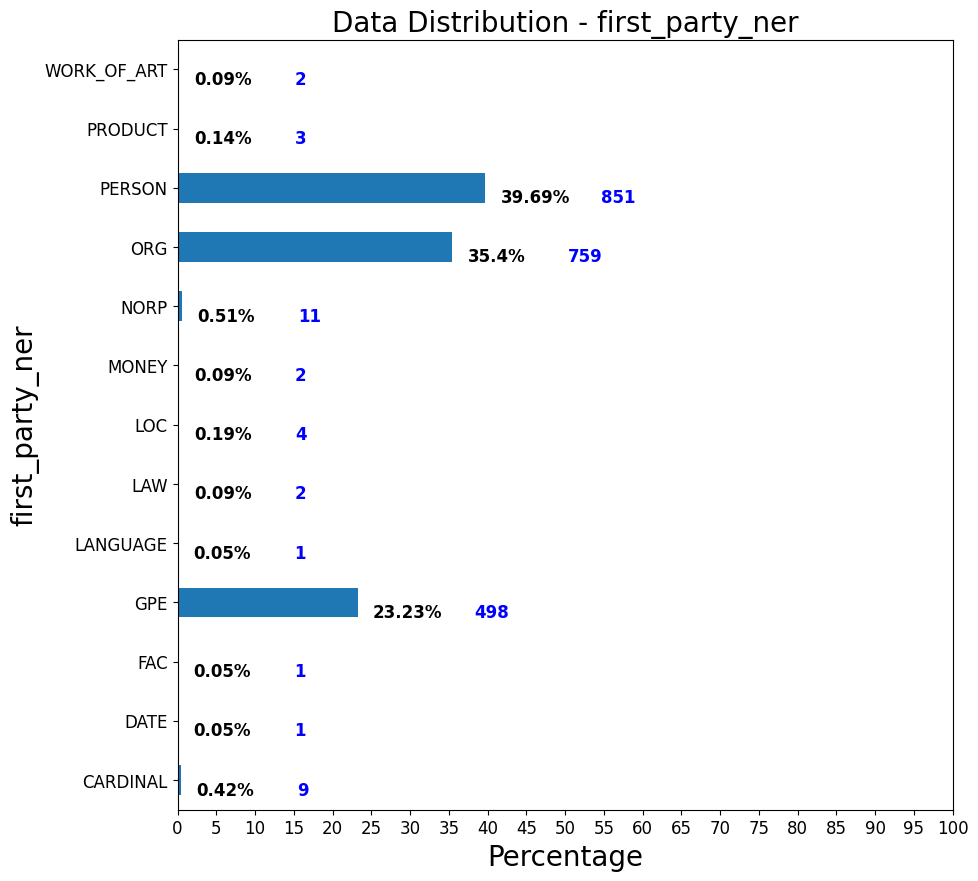

In [36]:
data_distribution_graph(train, ['first_party_ner'])

In [66]:
train.loc[train['first_party_ner'] == 'PERSON'][['first_party_winner']].value_counts()

first_party_winner
1                     539
0                     312
dtype: int64

In [67]:
train.loc[train['first_party_ner'] == 'ORG'][['first_party_winner']].value_counts()

first_party_winner
1                     515
0                     244
dtype: int64

In [68]:
train.loc[train['first_party_ner'] == 'GPE'][['first_party_winner']].value_counts()

first_party_winner
1                     366
0                     132
dtype: int64

In [69]:
train.head()

,ID,first_party,second_party,facts,first_party_winner,first_party_ner,second_party_ner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana. During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union. Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. \nThompson successfully sued St. Amant for defamation. Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with “malice.” Thompson then appealed to the Supreme Court of Louisiana. That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true. Finally, that court held that the First Amendment protects uninhibited, robust debate, rather than an open season to shoot down the good name of anyone who happens to be a public servant. \n",1,PERSON,PERSON
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,"Ramon Nelson was riding his bike when he suffered a lethal blow to the back of his head with a baseball bat. After two eyewitnesses identified Lawrence Owens from an array of photos and then a lineup, he was tried and convicted for Nelson’s death. Because Nelson was carrying cocaine and crack cocaine potentially for distribution, the judge at Owens’ bench trial ruled that Owens was probably also a drug dealer and was trying to “knock [Nelson] off.” Owens was found guilty of first-degree murder and sentenced to 25 years in prison.\nOwens filed a petition for a writ of habeas corpus on the grounds that his constitutional right to due process was violated during the trial. He argued that the eyewitness identification should have been inadmissible based on unreliability and that the judge impermissibly inferred a motive when a motive was not an element of the offense. The district court denied the writ of habeas corpus, and Owens appealed. The YOU.S. Court of Appeals for the Seventh Circuit reversed the denial and held that the trial judge’s inference about Owens’s motive violated his right to have his guilt adjudicated solely based on the evidence presented at trial.\n",0,PERSON,PERSON
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.","An Alabama state court convicted Billy Joe Magwood of murder and sentenced him to death. Subsequently, an Alabama federal district court partially granted Mr. Magwood's petition for federal habeas corpus relief. The court upheld his conviction but instructed the state court to look at mitigating evidence when resentencing Mr. Magwood. Upon resentencing, the state court sentenced Mr. Magwood to death once again. Mr. Magwood filed a second petition for federal habeas corpus relief with the federal district court arguing that a judicial rule was retroactively applied in his case and that he lacked effective counsel at sentencing. The district court granted the petition and vacated Mr. Magwood's death sentence.\nOn appeal, the YOU.S. Court of Appeals for the Eleventh circuit reversed, holding that prisoners may not raise challenges to an original sentence that could have been raised in an earlier petition. The court also held that Mr. Magwood's counsel was not ineffective because he failed to raise an argument that had already been decided by the state's highest court adverse to his client's position.\n",1,PERSON,GPE
3,TRAIN_0003,Linkletter,Walker,"Victor Linkletter was convicted in state court on evidence illegally obtained by police prior to the Supreme Court decision concerning the Fourth Amendment in Mapp v. Ohio. Mapp applied the exclusionary rule to state criminal proceedings, denying the use of illegally obtained evide

In [44]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [46]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 11.6 MB/s eta 0:00:00


In [47]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

In [49]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.3 MB/s eta 0:00:00


In [50]:
import transformers
from textblob import TextBlob
nltk.download('punkt')
#imported data
df0 = train[train['first_party_winner']==0]
df1 = train[train['first_party_winner']==1]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
#created a list of all the facts
str_lis = df1.facts.values.tolist()
# concatenated all the facts
long_str = ' '.join(str_lis)
# extracted the nouns from the facts
blob = TextBlob(long_str)
noun_str = blob.noun_phrases
long_noun = ' '.join(noun_str)
# created list of nouns
tokenized = nltk.word_tokenize(long_noun)
long_tokens = ' '.join(tokenized)
import re
# removed all the non-alphabetic characters if any
regex = re.compile('[^a-zA-Z]')
#First parameter is the replacement, second parameter is your input string
final_str = regex.sub(' ', long_tokens)
# since our data is case-sensitive, changed all the nouns 1st character to capital
final_str
result = final_str.title()
final_tokenized = nltk.word_tokenize(result)
# augmented the data using contextual word embeddigs
# upto 50% of the non-nouns words have been changed
# used bert-base-cased model, since our data is case sensitive
# stopwords parameter is the list of words which will be skipped without substituting, where we gave list of nouns
# selected top 4 similar words from word embeddings
final_facts = []
for i in range(len(str_lis)):
  TOPK=4 #default=100
  ACT = 'substitute' #"substitute"
  aug_bert = naw.ContextualWordEmbsAug(
      model_path='bert-base-cased', aug_p=0.5,
      stopwords=final_tokenized,
      device='cuda',
      action=ACT, top_k=TOPK)
  print(i)
  #print("Original:")
  #print(test_sentence)
  #print("Augmented Text:")
  final_facts.append(str_lis[i])
  for j in range(4):
    augmented_text = aug_bert.augment(str_lis[i])
    final_facts.append(augmented_text)
    #print(augmented_text)
df1_few = df1.drop(['facts'], axis=1)
lis_data = df1_few.values.tolist()
flis = []
for i in range(len(lis_data)):
  for j in range(5):
    flis.append(lis_data[i])
fdf = pd.DataFrame(flis, columns =['index', 'ID', 'name', 'href', 'first_party', 'second_party', 'winning_party', 'winner_index'])
factdf = pd.DataFrame(final_facts, columns =['Facts'])
fdf['Facts'] = factdf['Facts']
df0_few1 = df0.drop(['facts'], axis=1)
df0_few1['Facts'] = df0['facts']
result1 = df0_few1.append(fdf)

KeyboardInterrupt: ignored

# **2. 파생변수 생성**

* first_party_win_percent	: 첫 번째 당사자가 승소할 확률. 출현 빈도가 2이상일때만 반영함. 1일때는 0.5
* test에서는 first_party가 train의 first_party와 겹치는 경우에는 해당 사람의 승소할 확률을 반영함. 겹치지 않는 경우는 0.5로 반영함.

In [57]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [71]:
train['sen_len'] = 0 # 문장 토큰화
train['word_len'] = 0 # 단어 토큰화

for i in range(len(train)):
  train.sen_len[i] = len(nltk.sent_tokenize(train.facts[i]))
  train.word_len[i] = len(word_tokenize(train.facts[i]))

train = train[['first_party', 'second_party', 'facts', 'sen_len', 'word_len','first_party_ner','second_party_ner', 'first_party_winner']]
train.head(10)

,first_party,second_party,facts,sen_len,word_len,first_party_ner,second_party_ner,first_party_winner
0,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana. During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union. Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. \nThompson successfully sued St. Amant for defamation. Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with “malice.” Thompson then appealed to the Supreme Court of Louisiana. That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true. Finally, that court held that the First Amendment protects uninhibited, robust debate, rather than an open season to shoot down the good name of anyone who happens to be a public servant. \n",7,201,PERSON,PERSON,1
1,Stephen Duncan,Lawrence Owens,"Ramon Nelson was riding his bike when he suffered a lethal blow to the back of his head with a baseball bat. After two eyewitnesses identified Lawrence Owens from an array of photos and then a lineup, he was tried and convicted for Nelson’s death. Because Nelson was carrying cocaine and crack cocaine potentially for distribution, the judge at Owens’ bench trial ruled that Owens was probably also a drug dealer and was trying to “knock [Nelson] off.” Owens was found guilty of first-degree murder and sentenced to 25 years in prison.\nOwens filed a petition for a writ of habeas corpus on the grounds that his constitutional right to due process was violated during the trial. He argued that the eyewitness identification should have been inadmissible based on unreliability and that the judge impermissibly inferred a motive when a motive was not an element of the offense. The district court denied the writ of habeas corpus, and Owens appealed. The YOU.S. Court of Appeals for the Seventh Circuit reversed the denial and held that the trial judge’s inference about Owens’s motive violated his right to have his guilt adjudicated solely based on the evidence presented at trial.\n",8,220,PERSON,PERSON,0
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.","An Alabama state court convicted Billy Joe Magwood of murder and sentenced him to death. Subsequently, an Alabama federal district court partially granted Mr. Magwood's petition for federal habeas corpus relief. The court upheld his conviction but instructed the state court to look at mitigating evidence when resentencing Mr. Magwood. Upon resentencing, the state court sentenced Mr. Magwood to death once again. Mr. Magwood filed a second petition for federal habeas corpus relief with the federal district court arguing that a judicial rule was retroactively applied in his case and that he lacked effective counsel at sentencing. The district court granted the petition and vacated Mr. Magwood's death sentence.\nOn appeal, the YOU.S. Court of Appeals for the Eleventh circuit reversed, holding that prisoners may not raise challenges to an original sentence that could have been raised in an earlier petition. The court also held that Mr. Magwood's counsel was not ineffective because he failed to raise an argument that had already been decided by the state's highest court adverse to his client's position.\n",9,192,PERSON,GPE,1
3,Linkletter,Walker,"Victor Linkletter was convicted in state court on evidence illegally obtained by police prior to the Supreme Court decision concerning the Fourth Amendment in Mapp v. Ohio. Mapp applied the exclusionary rule to state criminal proceedings, denying the use of illegally obtained evidence at trial

In [ ]:
# winner: 해당 사건에서 승소한 사람
# frequency: winner의 총 등장 횟수
# win_percentage: 승소한 사람이 다른 사건에서도 승소할 확률

train['winner']=0
train['winner_frequency']=0
train['win_percentage']=0

for i in range(len(train)):
  if train['first_party_winner'][i]==1:
    train['winner'][i] = train['first_party'][i]
  else:
    train['winner'][i] = train['second_party'][i]

#for i in range(len(train)):
#  train['winner_frequency'][i] = len(train.loc[train['first_party'] == train['winner'][i]]) + len(train.loc[train['second_party'] == train['winner'][i]])
#  train['win_percentage'][i]= len(train.loc[train['winner'] == train['winner'][i]]) /(len(train.loc[train['first_party'] == train['winner'][i]]) + len(train.loc[train['second_party'] == train['winner'][i]]))

In [ ]:
# train['loser']=0
# train['lose_frequency']=0
# train['lose_percentage']=0

# for i in range(2477):
#   if train['first_party_winner'][i]==0:
#     train['loser'][i] = train['first_party'][i]
#   else:
#     train['loser'][i] = train['second_party'][i]

# for i in range(2477):
#   train['lose_frequency'][i] = len(train.loc[train['first_party'] == train['loser'][i]]) + len(train.loc[train['second_party'] == train['loser'][i]])
#   train['lose_percentage'][i]= len(train.loc[train['loser'] == train['loser'][i]]) /(len(train.loc[train['first_party'] == train['loser'][i]]) + len(train.loc[train['second_party'] == train['loser'][i]]))

In [ ]:
# first_party_frequency: first_party가 나타난 빈도
# first_party_win_percent: first_party가 승소할 확률 / 출현 빈도가 2이상일때만 반영함. 1일때는 0.5
train['first_party_win_percent'] = 0
train['first_party_frequency'] = 0

for i in range(len(train)):
  train['first_party_frequency'][i] = len(train.loc[train['first_party'] == train['first_party'][i]]) + len(train.loc[train['second_party'] == train['first_party'][i]])

  if (len(train.loc[train['first_party'] == train['first_party'][i]]) + len(train.loc[train['second_party'] == train['first_party'][i]])) > 1:
    train['first_party_win_percent'][i]= len(train.loc[train['winner'] == train['first_party'][i]]) /(len(train.loc[train['first_party'] == train['first_party'][i]]) + len(train.loc[train['second_party'] == train['first_party'][i]]))
  else:
    train['first_party_win_percent'][i] = 0.5

In [ ]:
train.tail(2)

,first_party,second_party,facts,sen_len,word_len,first_party_winner,winner,winner_frequency,win_percentage,first_party_win_percent,first_party_frequency
3365,Florida,Georgia,This is an ongoing case of original jurisdicti...,2,39,0,Georgia,0,0,0.62069,29
3366,PennEast Pipeline Co. LLC,"New Jersey, et al.","The Natural Gas Act (NGA), 15 U.S.C. §§ 717–71...",7,185,1,PennEast Pipeline Co. LLC,0,0,0.50000,1


In [ ]:
#train=train.drop(['winner',	'winner_frequency',	'win_percentage',	'loser',	'lose_frequency',	'lose_percentage'],axis=1)
train=train.drop(['winner',	'winner_frequency',	'win_percentage'],axis=1)

In [ ]:
train

,first_party,second_party,facts,sen_len,word_len,first_party_winner,first_party_win_percent,first_party_frequency
0,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",7,201,1,0.500000,1
1,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,7,219,0,0.500000,1
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,8,191,1,0.500000,1
3,Linkletter,Walker,Victor Linkletter was convicted in state court...,3,59,0,0.500000,1
4,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",9,200,1,0.500000,1
...,...,...,...,...,...,...,...,...
3362,"Roman Catholic Diocese of Brooklyn, New York","Andrew M. Cuomo, Governor of New York",In an effort to curb rising infections of COVI...,7,192,1,0.500000,1
3363,"Jose Santos Sanchez, et al.","Alejandro N. Mayorkas, Secretary of Homeland S...",Petitioners Jose Sanchez and his wife were cit...,7,235,0,0.500000,1
3364,United States,Refugio Palomar-Santiago,"Refugio Palomar-Santiago, a Mexican national, ...",17,384,1,0.584942,518
3365,Florida,Georgia,This is an ongoing case of original jurisdicti...,2,39,0,0.620690,29


In [72]:
lst_stopwords = nltk.corpus.stopwords.words("english")
ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in
                    lst_stopwords]

    ## 어간추출 Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    ## 표제어 추출 Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    ## back to string from list
    text = " ".join(lst_text)
    return text

In [81]:
vectorizer = TfidfVectorizer()

def get_vector(vectorizer, df, train_mode):
    # 데이터 클리닝
    df["fact_processing"] = df["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

    # TF-IDF -- 파라미터 조정 필요?
    if train_mode:
        X_facts = vectorizer.fit_transform(df['fact_processing'])
    else:
        X_facts = vectorizer.transform(df['fact_processing'])

    X_party1 = vectorizer.transform(df['first_party'])
    X_party2 = vectorizer.transform(df['second_party'])
    X_party3 = vectorizer.transform(df['first_party_ner'])
    X_party4 = vectorizer.transform(df['second_party_ner'])

    X = np.concatenate([X_party1.todense(), X_party2.todense(), X_party3.todense(), X_party4.todense(),X_facts.todense()], axis=1)
    return X

In [74]:
train.isnull().sum()

first_party             0
second_party            0
facts                   0
sen_len                 0
word_len                0
first_party_ner       334
second_party_ner      294
first_party_winner      0
dtype: int64

In [79]:
train['first_party_ner'] = train['first_party_ner'].fillna('모름')
train['second_party_ner'] = train['second_party_ner'].fillna('모름')

In [80]:
train['first_party_ner'].value_counts()

PERSON         851
ORG            759
GPE            498
모름             334
NORP            11
CARDINAL         9
LOC              4
PRODUCT          3
LAW              2
MONEY            2
WORK_OF_ART      2
LANGUAGE         1
DATE             1
FAC              1
Name: first_party_ner, dtype: int64

In [82]:
# 벡터화 함수 적용
X = get_vector(vectorizer, train, True)
Y = train["first_party_winner"]
X_train = np.asarray(X) # np.array 활용 및 적용
Y_train = np.asarray(Y)

In [83]:
X.shape

(2478, 89890)

In [84]:
Y.shape

(2478,)

In [85]:
X_train.shape

(2478, 89890)

In [ ]:
Y.value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       0
4       1
       ..
3362    1
3363    0
3364    1
3365    0
3366    1
Name: first_party_winner, Length: 3365, dtype: int64>

In [86]:
x_train, x_test, yy_train, yy_test = train_test_split(X_train,Y_train, test_size=0.25)

#**Define Model & Train**

로지스틱 회귀

In [87]:
#logistic
model = LogisticRegression()

#X_train = np.asarray(x_train) # np.array 활용 및 적용
#Y_train = np.asarray(yy_train)
#X_test = np.asarray(x_test) # np.array 활용 및 적용
#Y_test = np.asarray(yy_test)

model = LogisticRegression()
model.fit(x_train, yy_train)

LogisticRegression()

In [88]:
model.score(x_test,yy_test)

0.6709677419354839

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

랜덤포레스트

In [91]:
#logistic
model = RandomForestClassifier()
model.fit(x_train, yy_train)

RandomForestClassifier()

In [ ]:
model.score(x_train,yy_train)

1.0

In [92]:
model.score(x_test,yy_test)

0.6741935483870968

KNeighborsClassifier(n_neighbors=3)

In [93]:
model = knn=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, yy_train)

KNeighborsClassifier(n_neighbors=7)

In [94]:
model.score(x_test,yy_test)

0.6403225806451613

XGBClassifier()

In [ ]:
model = XGBClassifier()
model.fit(x_train, yy_train)

In [ ]:
model.score(X_test,Y_test)

CATBOOST

In [95]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.5 MB/s eta 0:00:00


In [96]:
from catboost import CatBoostClassifier, Pool

In [ ]:
Y.value_counts()

1    2194
0    1171
Name: first_party_winner, dtype: int64

In [98]:
counts = list(Y.value_counts())
class_weight = [counts[1]/sum(counts), counts[0]/sum(counts)]
print("weight :", class_weight)

weight : [0.33454398708635996, 0.66545601291364]


In [99]:
model = CatBoostClassifier(random_seed=42,class_weights=class_weight, verbose=0)
model.fit(x_train, yy_train)

In [100]:
model.score(x_test,yy_test)

0.6741935483870968

#**submission**

In [104]:
#테스트 전처리
test['facts'] = test['facts'].apply(fix_contractions)

for idx, value in test.iterrows():
  first = value['first_party']
  second = value['second_party']
  doc = nlp(first)
  for ent in doc.ents:
    test.loc[idx, 'first_party_ner'] = ent.label_
  doc = nlp(second)
  for ent in doc.ents:
    test.loc[idx, 'second_party_ner'] = ent.label_

test['first_party_ner'] = test['first_party_ner'].fillna('모름')
test['second_party_ner'] = test['second_party_ner'].fillna('모름')

In [105]:
test.head()

,ID,first_party,second_party,facts,fact_processing,second_party_ner,first_party_ner
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal courts to detain an arrestee prior to trial if the government could prove that the individual was potentially dangerous to other people in the community. Prosecutors alleged that Salerno and another person in this case were prominent figures in the La Cosa Nostra crime family.\n,1984 bail reform act allowed federal court detain arrestee prior trial government could prove individual potentially dangerous people community prosecutor alleged salerno another person case prominent figure la cosa nostra crime family,GPE,모름
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.","Lexecon Inc. was a defendant in a class action lawsuit. Under 28 USC section 1407(a), the lawsuit was transferred for pretrial proceedings to the District of Arizona. Section 1407(a) authorizes the Judicial Panel on Multidistrict Litigation to transfer civil actions with common issues of fact ""to any district for coordinated or consolidated pretrial proceedings,"" but provides that the Panel ""shall"" remand any such action to the original district ""at or before the conclusion of such pretrial proceedings."" After claims against it were dismissed, Lexecon brought suit against Milberg Weiss Bershad Hynes & Lerach and others (Milberg) in the class action lawsuit in the Northern District of Illinois. Ultimately, the Panel, under section 1407(a), ordered the case transferred to the District of Arizona. Afterwards, Lexecon moved for the Arizona District Court to remand the case to Illinois. Milberg filed a countermotion requesting the Arizona District Court to invoke section 1404(a) to ""transfer"" the case to itself for trial.Ultimately, the court assigned the case to itself and the Court of Appeals affirmed its judgment.\n",lexecon inc defendant class action lawsuit 28 usc section 1407a lawsuit transferred pretrial proceeding district arizona section 1407a authorizes judicial panel multidistrict litigation transfer civil action common issue fact district coordinated consolidated pretrial proceeding provides panel shall remand action original district conclusion pretrial proceeding claim dismissed lexecon brought suit milberg wei bershad hynes lerach others milberg class action lawsuit northern district illinois ultimately panel section 1407a ordered case transferred district arizona afterwards lexecon moved arizona district court remand case illinois milberg filed countermotion requesting arizona district court invoke section 1404a transfer case trialultimately court assigned case court appeal affirmed judgment,ORG,PERSON
2,TEST_0002,"No. 07-582\t Title: \t Federal Communications Commission, et al.","Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broadcast the Billboard Music Awards, an annual program honoring top-selling musicians. During the broadcasts, one musician used an explicative in his acceptance speech, and a presenter used two expletives. The Federal Communications Commission (FCC), although it had previously taken the position that such fleeting and isolated expletives did not violate its indecency regime, issued notices of liability to Fox for broadcasting the profane language. The FCC argued that previous decisions referring to ""fleeting"" expletives were merely staff letters and dicta and did not accurately represent its position on the matter. Fox appealed the FCC sanctions to the YOU.S. Court of Appeals for the Second Circuit.\nThe Second Circuit held that the FCC's liability order was ""arbitrary and capricious"" under the governing Administrative Procedure Act because the FCC had completely reversed its position on fleeting expletives without giving a proper justification. The Second Circuit also failed to find any evidence that the expletives were harmful.\n",2002 2003 fox television station broadcast billboard music award annual pro

In [106]:
# 벡터화 함수 적용
X_train = get_vector(vectorizer, train, True)
Y_train = train["first_party_winner"]
X_test = get_vector(vectorizer, test, False)

In [108]:
model = LogisticRegression()

X_train = np.asarray(X_train) # np.array 활용 및 적용
Y_train = np.asarray(Y_train)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [109]:
submit = pd.read_csv('/content/drive/MyDrive/DACON_JudgmentPrediction/data/sample_submission.csv')

In [110]:
X_test = np.asarray(X_test)
pred = model.predict(X_test)

In [111]:
submit['first_party_winner'] = pred
submit.to_csv('/content/drive/MyDrive/DACON_JudgmentPrediction/code/submission/submit_partyclass.csv', index=False)
print('Done')

Done
